In [123]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 1000, 'display.width', 1000, 'display.max_rows',1000)

In [124]:
# read customer level data
df = pd.read_csv("6M-0K-99K.users.dataset.public.csv")

# read country names (English) data
country_data = pd.read_csv("country_data.csv")

In [125]:
# check count of rows and columns in the dataset
df.shape

(98913, 24)

In [126]:
df.sample(5)

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
66332,-860757731056196670,user,Allemagne,en,5,9,1,0,0,0.0,6,0,F,2,mrs,False,False,False,False,395,2857,95.23,7.94,de
949,-8649394264926591476,user,Etats-Unis,en,3,8,0,0,0,0.0,0,0,F,2,mrs,False,False,False,True,709,3205,106.83,8.90,us
4552,-5610959267019636868,user,France,fr,4,8,0,0,0,0.0,0,0,F,2,mrs,False,False,False,True,707,3203,106.77,8.90,fr
94953,-863130325403254711,user,Etats-Unis,en,3,8,0,0,0,0.0,0,0,F,2,mrs,False,False,False,True,708,3204,106.80,8.90,us
19029,2890967942485392556,user,France,fr,3,8,0,0,0,0.0,0,0,M,1,mr,True,False,True,True,697,3200,106.67,8.89,fr


# Data Dictionary

| Feature | Description  |
| :- | :- |
| identifierHash | Anonymous unique id |
|language | The user's preferred language (the language of their interface when using the site) |     
|socialNbFollowers | Number of users who follow this user's activity |      
|socialNbFollows | Number of user account this user follows |
|socialProductsLiked | Number of products this user liked |
|productsListed | Number of currently unsold products that this user has uploaded |     
|productsSold | Number of products this user has sold |      
|productsPassRate | % of products meeting the product description |      
|productsWished | Number of products this user added to his/her wishlist |        
|productsBought | Number of products this user bought |        
|gender | user's gender |                
|hasAnyApp | user has ever used any of the store's official app |             
|hasAndroidApp | user has ever used the official Android app |         
|hasIosApp | user has ever used the official iOS app |             
|hasProfilePicture | user has a custom profile picture |      
|daysSinceLastLogin | Number of days since the last login. All user data were fetched the same day |
|seniority | Number of days since the user registered |             
|seniorityAsMonths | Seniority expressed in months |     
|seniorityAsYears | Seniority expressed in years |
|country | Country name |           
|landmass | Continent name |              

# Data Exploration

### 1. Number of users

In [128]:
len(df['identifierHash'])

98913

There are details of over 98,000 users in the dataset.

### 2. Inactive days since last login

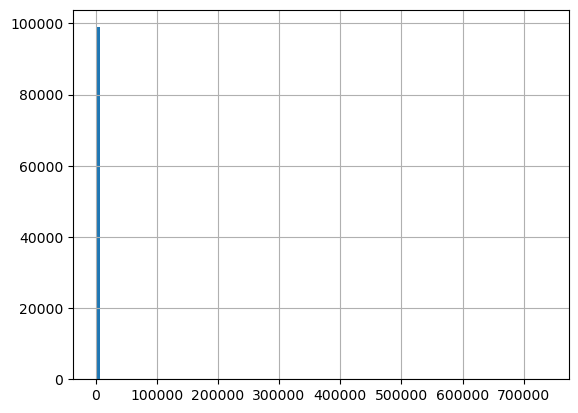

In [129]:
df['daysSinceLastLogin'].hist(bins = 100).plot();

The range of horizontal axis goes up to 700,000 that seems doubtful. Let's check maximum seniority of the users.

In [130]:
df['seniorityAsYears'].max()

8.9

In [131]:
9*365

3285

Maximum duration any user has been associated with the platform is 8.9 years. Therefore, maximum number of inactive days cannot be more than 3285. Let's check how many users have daysSinceLastLogin > 3285.

In [132]:
len(df[df['daysSinceLastLogin'] > 3285])

10

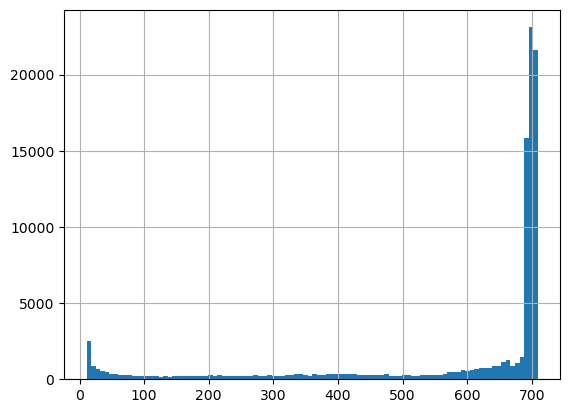

In [133]:
df[df['daysSinceLastLogin'] <= 3285]['daysSinceLastLogin'].hist(bins = 100).plot();

In [134]:
print(len(df[df['daysSinceLastLogin'] <= 450]) / len(df))
print(len(df[(df['daysSinceLastLogin'] > 450) & (df['daysSinceLastLogin'] <= 3825)]) / len(df))

0.20292580348386965
0.7969730975705923


According to the Pareto principle, in any business about 80% of company's revenue come from about 20% of its customers. So, around 20% of the customers have at least once logged in to the store in the last 450 days as per the insight above. These users should be given more importance than others.

### 3. Products purchased by the users

Proportion of users who purchased at least one product:

In [135]:
len(df[df['productsBought'] > 0])/len(df)

0.054785518587041136

Proportion of users who purchased more than one product:

In [136]:
len(df[df['productsBought'] > 1])/len(df)

0.021453196243163185

So, out of ~98,000 users, 5% users bought a product and 2% users bought multiple products.

Total products purchased from the store:

In [137]:
df['productsBought'].sum()

17006

### 4. Products sold by the users

In [138]:
len(df[df['productsSold'] > 0])/len(df)

0.0205837453115364

In [139]:
len(df[df['productsSold'] > 1])/len(df)

0.01131297200570198

In [140]:
df['productsSold'].sum()

12027

### 5. Products listed by the users

In [141]:
len(df[df['productsListed'] > 0])/len(df)

0.017429458210750863

In [142]:
df['productsListed'].sum()

9229

### 6. Products kept in wishlist

In [143]:
len(df[df['productsWished'] > 0])/len(df)

0.09403212924489197

In [144]:
len(df[df['productsWished'] > 0])

9301

Around 10% of the users have kept at least a product in their wishlist.

Let's find the count of users who have not just kept products in their wishlist but also made some purchases from the store.

In [145]:
len(df[(df['productsBought'] > 0) & (df['productsListed'] > 0)])

446

### 7. Products liked by the users

[]

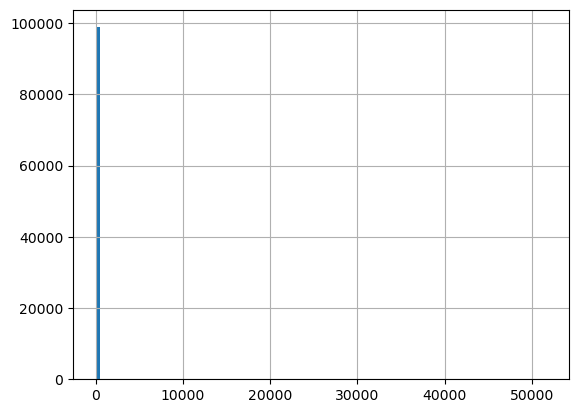

In [146]:
df['socialProductsLiked'].hist(bins = 100).plot()

In [147]:
len(df[df['socialProductsLiked'] > 450])

124

In [148]:
len(df[(df['socialProductsLiked'] > 0) & (df['socialProductsLiked'] <= 450)])/len(df)

0.1597565537391445

In [149]:
len(df[(df['socialProductsLiked'] > 1) & (df['socialProductsLiked'] <= 450)])/len(df)

0.10656839849160374

### 8. Users of mobile app

In [150]:
df['hasAnyApp'].value_counts(normalize=True)

False    0.735384
True     0.264616
Name: hasAnyApp, dtype: float64

In [151]:
pd.crosstab(df['hasAnyApp'], df['hasAndroidApp'])

hasAndroidApp,False,True
hasAnyApp,,
False,72739,0
True,21355,4819


In [152]:
pd.crosstab(df['hasAnyApp'], df['hasIosApp'])

hasIosApp,False,True
hasAnyApp,,
False,72739,0
True,4647,21527


In [153]:
pd.crosstab(df['hasAndroidApp'], df['hasIosApp'])

hasIosApp,False,True
hasAndroidApp,,
False,72739,21355
True,4647,172


### 9. Distribution of users based on regions

In [154]:
df['country'].value_counts()

France                                    25135
Etats-Unis                                20602
Royaume-Uni                               11310
Italie                                     8015
Allemagne                                  6567
Espagne                                    5706
Australie                                  2719
Danemark                                   1892
Suède                                      1826
Belgique                                   1666
Canada                                     1577
Pays-Bas                                   1529
Suisse                                      859
Hong Kong                                   854
Finlande                                    661
Autriche                                    624
Russie                                      490
Irlande                                     452
Chine                                       428
Roumanie                                    329
Singapour                               

The name of the countries is in French. So, we will get the English names of the countries for each user using the 'country_data' dataframe.

In [155]:
country_data.head()

,identifierhash,country_en,landmass
0,-7279641312655250028,United States of America,North America
1,-1456013578740053406,Germany,Europe
2,-6727673442828273069,United States of America,North America
3,-1803573362480910736,United States of America,North America
4,-8913288569589793262,France,Europe


Before joining two dataframes we should make sure that the joining column name should be same in both the dataframes.

In [156]:
# change column names
country_data.columns = ['identifierHash', 'country_en', 'landmass']

In [157]:
# join country data to the main data
df = pd.merge(df, country_data, how = "left")

# remove rows with missing data
df = df.dropna()

In [158]:
df.head(3)

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode,country_en,landmass
0,-7279641312655250028,user,Etats-Unis,en,3,8,0,0,0,0.0,0,0,F,2,mrs,False,False,False,True,709,3205,106.83,8.9,us,United States of America,North America
1,-1456013578740053406,user,Allemagne,de,3,8,0,0,0,0.0,0,0,F,2,mrs,False,False,False,True,709,3205,106.83,8.9,de,Germany,Europe
2,9006282053848196165,user,Suède,en,3,8,0,0,0,0.0,0,0,M,1,mr,True,False,True,True,689,3205,106.83,8.9,se,Sweden,Europe


In [159]:
df['country_en'].value_counts()

France                                                                       25135
United States of America                                                     20602
United Kingdom of Great Britain and Northern Ireland                         11310
Italy                                                                         8015
Germany                                                                       6567
Kingdom of Spain                                                              5706
Commonwealth of Australia                                                     2719
Denmark                                                                       1892
Sweden                                                                        1826
Kingdom of Belgium                                                            1666
Canada                                                                        1577
Netherlands                                                                   1529
Swit

It is quite evident most of the users belong to Europe and US. Let's also check out distribution of users landmass-wise.

In [160]:
df['landmass'].value_counts()

Europe              68451
North America       22562
Asia                 3235
Oceania              2875
Africa                688
Eurasia               674
South America         316
Asia and Oceania       75
Africa and Asia        28
Name: landmass, dtype: int64

# Data Cleaning

Columns to ignore:

* __type__ - only one value is there for all the rows
* __country__ - country names in French
* __civilityGenderId__ - not required
* __civilityTitle__ - not required
* __countryCode__ - we will use country names in English language, so this feature is not needed

In [161]:
# delete columns
df = df.drop(['type', 'country', 'civilityGenderId', 'civilityTitle', 'countryCode'], axis=1)

Keep data of users that have 'daysSinceLastLogin' <= 3285

In [162]:
df = df[df['daysSinceLastLogin'] <= 3285]

Remove users that have likes count more than 450.

In [163]:
df = df[df['socialProductsLiked'] <= 450]

# Adaptation

### 1. New Column - User Activity

As observed earlier, around 20% of the users have logged in at least once in the last 450 days. So, lets highlight such customers.

In [164]:
df["userActivity"] = np.where(df['daysSinceLastLogin'] <= 450, "more active", "less active")

### 2. New Column - Social Media Influence Score

Another important feature that we can create is the ratio of the number of followers of a user and the users being followed by him/her. Higher the ratio the more influence that user has on the social media.

In [166]:
df["socialInfluenceScore"] = df["socialNbFollowers"]/df["socialNbFollows"]

# Data Visualization

### 1. Top 5 countries in terms of user count

In [189]:
# get top 5 countries based on user count
data = df['country_en'].value_counts().head(5).reset_index()

In [190]:
data

,index,country_en
0,France,25120
1,United States of America,20581
2,United Kingdom of Great Britain and Northern I...,11297
3,Italy,8002
4,Germany,6552


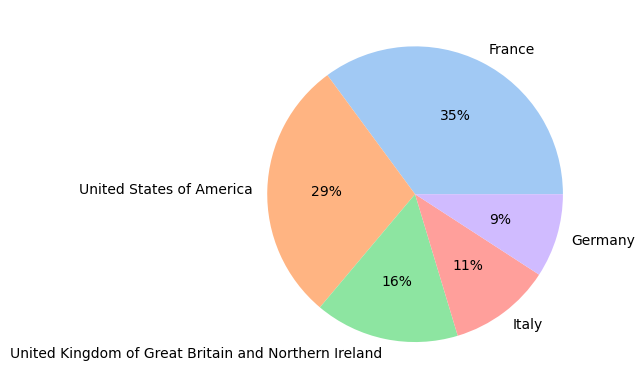

In [191]:
plt.pie(data['country_en'], labels = data['index'], colors = sns.color_palette('pastel')[0:6], autopct='%.0f%%')
plt.show()

France has the most number of users (35%) followed by US (29%) and UK (16%).

### 2. Products bought and products sold, gender wise

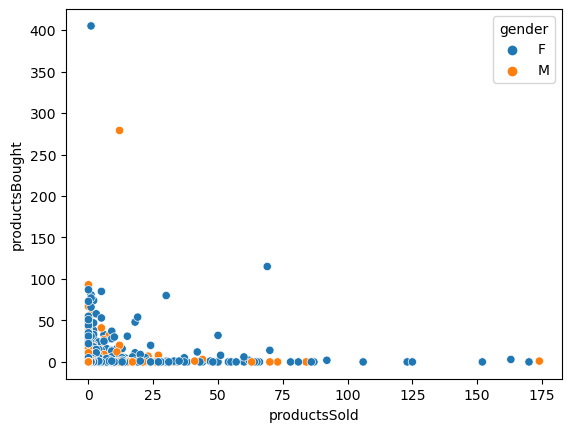

In [181]:
sns.scatterplot(data = df, x = 'productsSold', y = 'productsBought', hue="gender")
plt.show()

### 3. Social media influence score by user activity level

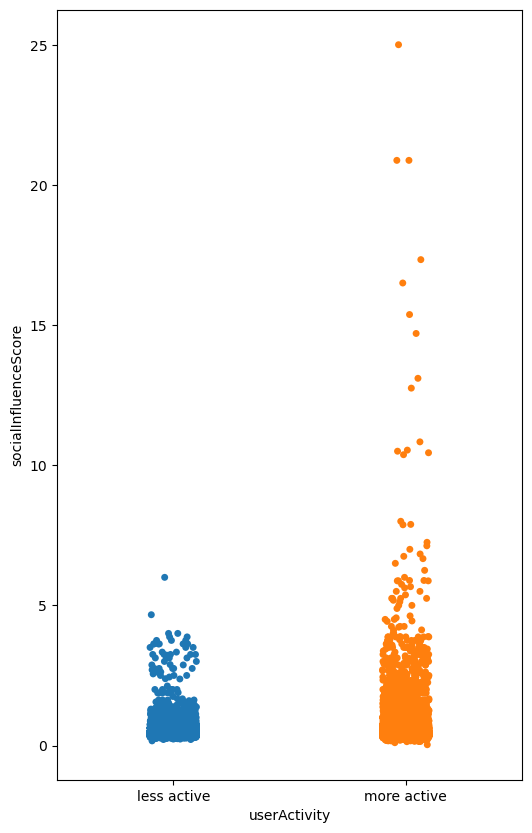

In [185]:
plt.figure(figsize=(6,10))
sns.stripplot(data = df, x = 'userActivity', y = 'socialInfluenceScore')
plt.show()

### 4. Correlation among number of products liked, number of products and count of products bought 

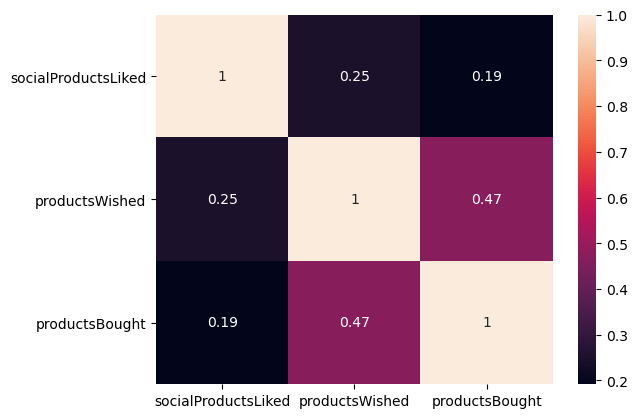

In [194]:
sns.heatmap(df[['socialProductsLiked', 'productsWished', 'productsBought']].corr(), annot=True)
plt.show()

There is a strong correlation between number of products kept in the wishlist and the number of products purchased.